In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
# import requests
# import time
# import pprint
# import json
# import os

In [2]:
# Read in csv 
total_cleaned_data_df = pd.read_csv("Annual_HSS_Data_Cleaned.csv", low_memory=False)
s = total_cleaned_data_df.loc[total_cleaned_data_df["action_date_fiscal_year"] > 2011, :]
s.tail(2)

,contract_transaction_unique_key,contract_award_unique_key,award_id_piid,modification_number,parent_award_agency_name,federal_action_obligation,total_dollars_obligated,action_date_fiscal_year,period_of_performance_start_date,period_of_performance_current_end_date,...,community_developed_corporation_owned_firm,federal_agency,foreign_owned_and_located,for_profit_organization,dot_certified_disadvantage,self_certified_small_disadvantaged_business,small_disadvantaged_business,c8a_program_participant,historically_underutilized_business_zone_hubzone_firm,sba_certified_8a_joint_venture
644454,7523_-NONE-_HHSD200201033940C_14_-NONE-_0,CONT_AWD_HHSD200201033940C_7523_-NONE-_-NONE-,HHSD200201033940C,14,NaN,-40260.0,7.092032e+08,2012,2012-06-18 00:00:00,2011-09-30 00:00:00,...,f,f,f,t,f,f,f,f,f,f
644455,7523_9700_HHSD2002010F35330_4_W91QUZ06A0003_0,CONT_AWD_HHSD2002010F35330_7523_W91QUZ06A0003_...,HHSD2002010F35330,4,DEPT OF DEFENSE,0.0,5.993009e+05,2012,2011-11-09 00:00:00,2012-07-10 00:00:00,...,f,f,f,f,f,f,f,f,f,f


In [4]:
# Build DataFrame with fields for Fiscal Year (FY), $, biz-size-code, and minority small biz columns
# Small Business Analysis = sba

columns = ["action_date_fiscal_year", "federal_action_obligation", 
           "contracting_officers_determination_of_business_size_code", "minority_owned_business", 
           "subcontinent_asian_asian_indian_american_owned_business", "asian_pacific_american_owned_business", 
           "black_american_owned_business", "hispanic_american_owned_business", "native_american_owned_business", 
           "other_minority_owned_business"]

sba_all_df = s.loc[:, columns]
sba_all_df = sba_all_df.rename(columns = {"action_date_fiscal_year": "FY", "federal_action_obligation": "Obligated $", 
                                          "contracting_officers_determination_of_business_size_code": "Business Size (S/O)",
                                          "subcontinent_asian_asian_indian_american_owned_business": "Asian American (Indian Subcontinent)", 
                                          "asian_pacific_american_owned_business": "Asian American (Pacific)",
                                          "black_american_owned_business": "Black American", 
                                          "hispanic_american_owned_business": "Hispanic American", 
                                          "native_american_owned_business": "Native American", 
                                          "other_minority_owned_business": "Other Minority"})

sba_all_df.tail()
# sba_all_df["Obligated $"].sum()

,FY,Obligated $,Business Size (S/O),minority_owned_business,Asian American (Indian Subcontinent),Asian American (Pacific),Black American,Hispanic American,Native American,Other Minority
644451,2012,644387.92,S,f,f,f,f,f,f,f
644452,2012,0.00,S,f,f,f,f,f,f,f
644453,2012,24694.29,S,f,f,t,f,f,f,f
644454,2012,-40260.00,O,f,f,f,f,f,f,f
644455,2012,0.00,S,f,f,f,f,f,f,f


In [5]:
# Leverage sba_all_df to build another DataFrame that only includes the small business rows

sba_sb_df = s.loc[s["contracting_officers_determination_of_business_size_code"] == 'S', columns]

sba_sb_df = sba_sb_df.rename(columns = {"action_date_fiscal_year": "FY", "federal_action_obligation": "Obligated $", 
                                        "contracting_officers_determination_of_business_size_code": "Business Size (S/O)",
                                        "subcontinent_asian_asian_indian_american_owned_business": "Asian American (Indian Subcontinent)", 
                                        "asian_pacific_american_owned_business": "Asian American (Pacific)",
                                        "black_american_owned_business": "Black American", 
                                        "hispanic_american_owned_business": "Hispanic American", 
                                        "native_american_owned_business": "Native American", 
                                        "other_minority_owned_business": "Other Minority"})

# Leveraging the previous DataFrame create a grouped one that provides small business $ by year

sba_sb_1_df = pd.DataFrame(sba_sb_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_1_df['Small Business, $B'] = sba_sb_1_df['Obligated $'] / 1000000000
sba_sb_1_df = sba_sb_1_df.round(1)
sba_sb_1_df = sba_sb_1_df.drop('Obligated $', axis = 1)
sba_sb_1_df.head(2)

,"Small Business, $B"
FY,
2012,3.8
2013,4.4


In [6]:
# Replicate for 'other than small business' rows

sba_other_than_sb = s.loc[s["contracting_officers_determination_of_business_size_code"] == 'O', ["action_date_fiscal_year", "federal_action_obligation"]]

sba_other_than_sb = sba_other_than_sb.rename(columns = {"action_date_fiscal_year": "FY", "federal_action_obligation": "Obligated $"}) 
sba_other_than_sb_df = pd.DataFrame(sba_other_than_sb.groupby(['FY'])['Obligated $'].sum())
sba_other_than_sb_df['Other Than Small Business, $B'] = sba_other_than_sb_df['Obligated $'] / 1000000000
sba_other_than_sb_df = sba_other_than_sb_df.round(1)
sba_other_than_sb_df = sba_other_than_sb_df.drop('Obligated $', axis = 1)
sba_other_than_sb_df.head(2)

,"Other Than Small Business, $B"
FY,
2012,14.5
2013,15.4


In [31]:
# Merge the two tables to form the basis of the first visualization

plot1_df = pd.merge(sba_sb_1_df, sba_other_than_sb_df, how = "left", on = ['FY'])
# plot1_df.sum()
plot1_df

,"Small Business, $B","Other Than Small Business, $B"
FY,,
2012,3.8,14.5
2013,4.4,15.4
2014,4.9,16.7
2015,4.9,14.7
2016,5.5,14.4
2017,5.4,17.1
2018,5.6,15.9
2019,6.4,15.6


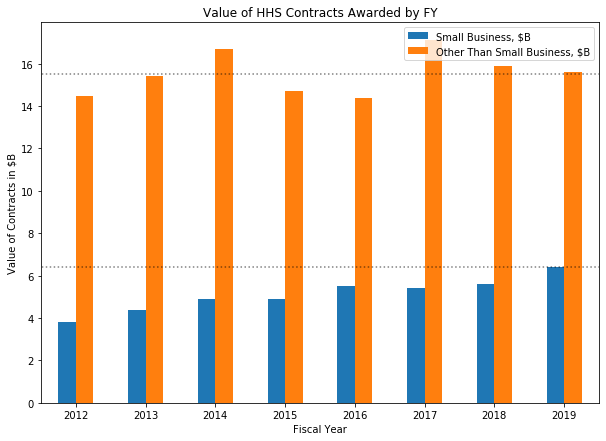

15.537500000000001

In [32]:
# Create the first visualization showing how small business award $ have changed over time as compared to other businesses

plot1_df.plot(kind='bar', stacked=False, figsize=(10,7), alpha=1, rot=0)
plt.title("Value of HHS Contracts Awarded by FY")
plt.xlabel("Fiscal Year")
plt.ylabel("Value of Contracts in $B")

plt.hlines((plot1_df['Small Business, $B'].max()), -1, 10, alpha=0.5, linestyles='dotted')
plt.hlines((plot1_df['Other Than Small Business, $B'].mean()), -1, 10, alpha=0.5, linestyles='dotted')

# Save Plot 1 as png file
plt.savefig("Small_and_Other.png")
plt.show()
# plot1_df['Other Than Small Business, $B'].mean()

In [9]:
# Create a DataFrame with just the minority owned small business data

sba_sb_minority_df = sba_sb_df.loc[sba_sb_df["minority_owned_business"] == 't',:]
sba_sb_minority_df = sba_sb_minority_df.drop('Business Size (S/O)', axis=1)
sba_sb_minority_df = sba_sb_minority_df.drop('minority_owned_business', axis=1)
sba_sb_minority_df.head(2)    
# sba_sb_minority_df['Obligated $'].sum()

,FY,Obligated $,Asian American (Indian Subcontinent),Asian American (Pacific),Black American,Hispanic American,Native American,Other Minority
0,2019,0.0,t,f,f,f,f,f
2,2019,0.0,f,f,t,f,f,f


In [10]:
# Create individual DataFrames for each minority type

sba_sb_minority_indian_df = sba_sb_minority_df.loc[sba_sb_minority_df['Asian American (Indian Subcontinent)'] == 't', :]
sba_sb_minority_indian_df = pd.DataFrame(sba_sb_minority_indian_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_indian_df['Asian American (Indian Subcontinent), $M'] = sba_sb_minority_indian_df['Obligated $'] / 1000000
sba_sb_minority_indian_df = sba_sb_minority_indian_df.round(1)
sba_sb_minority_indian_df = sba_sb_minority_indian_df.drop('Obligated $', axis = 1)
sba_sb_minority_indian_df

sba_sb_minority_pacific_df = sba_sb_minority_df.loc[sba_sb_minority_df['Asian American (Pacific)'] == 't', :]
sba_sb_minority_pacific_df = pd.DataFrame(sba_sb_minority_pacific_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_pacific_df['Asian American (Pacific), $M'] = sba_sb_minority_pacific_df['Obligated $'] / 1000000
sba_sb_minority_pacific_df = sba_sb_minority_pacific_df.round(1)
sba_sb_minority_pacific_df = sba_sb_minority_pacific_df.drop('Obligated $', axis = 1)
sba_sb_minority_pacific_df

sba_sb_minority_black_df = sba_sb_minority_df.loc[sba_sb_minority_df['Black American'] == 't', :]
sba_sb_minority_black_df = pd.DataFrame(sba_sb_minority_black_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_black_df['Black American, $M'] = sba_sb_minority_black_df['Obligated $'] / 1000000
sba_sb_minority_black_df = sba_sb_minority_black_df.round(1)
sba_sb_minority_black_df = sba_sb_minority_black_df.drop('Obligated $', axis = 1)
sba_sb_minority_black_df

sba_sb_minority_hispanic_df = sba_sb_minority_df.loc[sba_sb_minority_df['Hispanic American'] == 't', :]
sba_sb_minority_hispanic_df = pd.DataFrame(sba_sb_minority_hispanic_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_hispanic_df['Hispanic American, $M'] = sba_sb_minority_hispanic_df['Obligated $'] / 1000000
sba_sb_minority_hispanic_df = sba_sb_minority_hispanic_df.round(1)
sba_sb_minority_hispanic_df = sba_sb_minority_hispanic_df.drop('Obligated $', axis = 1)
sba_sb_minority_hispanic_df

sba_sb_minority_native_df = sba_sb_minority_df.loc[sba_sb_minority_df['Native American'] == 't', :]
sba_sb_minority_native_df = pd.DataFrame(sba_sb_minority_native_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_native_df['Native American, $M'] = sba_sb_minority_native_df['Obligated $'] / 1000000
sba_sb_minority_native_df = sba_sb_minority_native_df.round(1)
sba_sb_minority_native_df = sba_sb_minority_native_df.drop('Obligated $', axis = 1)
sba_sb_minority_native_df

sba_sb_minority_other_df = sba_sb_minority_df.loc[sba_sb_minority_df['Other Minority'] == 't', :]
sba_sb_minority_other_df = pd.DataFrame(sba_sb_minority_other_df.groupby(['FY'])['Obligated $'].sum())
sba_sb_minority_other_df['Other Minority, $M'] = sba_sb_minority_other_df['Obligated $'] / 1000000
sba_sb_minority_other_df = sba_sb_minority_other_df.round(1)
sba_sb_minority_other_df = sba_sb_minority_other_df.drop('Obligated $', axis = 1)
sba_sb_minority_other_df

,"Other Minority, $M"
FY,
2012,48.0
2013,54.2
2014,46.4
2015,62.9
2016,55.2
2017,34.1
2018,52.7
2019,46.0


In [11]:
# Merge individual minority type DataFrames to form the basis of the second visualization

plot2_df = pd.merge(sba_sb_minority_indian_df, sba_sb_minority_pacific_df, how = "left", on = ['FY'])
plot2_df = pd.merge(plot2_df, sba_sb_minority_black_df, how = "left", on = ['FY'])
plot2_df = pd.merge(plot2_df, sba_sb_minority_hispanic_df, how = "left", on = ['FY'])
plot2_df = pd.merge(plot2_df, sba_sb_minority_native_df, how = "left", on = ['FY'])
plot2_df = pd.merge(plot2_df, sba_sb_minority_other_df, how = "left", on = ['FY'])
plot2_df

,"Asian American (Indian Subcontinent), $M","Asian American (Pacific), $M","Black American, $M","Hispanic American, $M","Native American, $M","Other Minority, $M"
FY,,,,,,
2012,221.1,257.7,427.9,413.3,368.2,48.0
2013,254.6,290.9,388.6,633.5,298.7,54.2
2014,297.3,335.8,498.7,434.8,366.0,46.4
2015,401.9,407.4,512.5,454.9,435.3,62.9
2016,558.8,394.9,559.8,364.7,529.7,55.2
2017,663.2,302.7,533.3,278.1,520.7,34.1
2018,819.6,263.7,628.2,291.5,576.0,52.7
2019,917.5,290.1,810.5,314.4,584.5,46.0


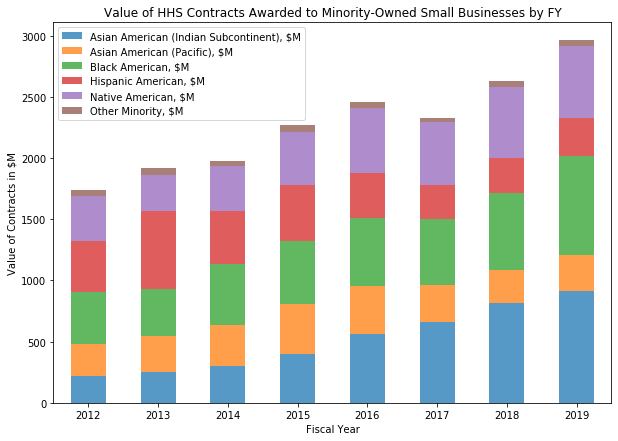

In [12]:
# Use the new merged DataFrame to create clustered columns by FY as Plot 2 (Small, minority-owned businesses)

plot2_df.plot(kind='bar', stacked=True, figsize=(10,7), alpha=0.75, rot=0)
plt.title("Value of HHS Contracts Awarded to Minority-Owned Small Businesses by FY")
plt.xlabel("Fiscal Year")
plt.ylabel("Value of Contracts in $M")

# Save Plot 2 as png file
plt.savefig("Minority_Small_Biz.png")
plt.show()